
# Identify Fraud from Enron Email - ENRON SCANDAL
### By:  Naman Sharma



[Summary link - Wikipedia](https://en.wikipedia.org/wiki/Enron_scandal)

>The Enron scandal was a financial scandal that eventually led to the bankruptcy of the Enron Corporation, an American energy company based in Houston, Texas, and the de facto dissolution of Arthur Andersen, which was one of the five largest audit and accountancy partnerships in the world. In addition to being the largest bankruptcy reorganization in American history at that time, Enron was cited as the biggest audit failure.

>Enron was formed in 1985 by Kenneth Lay after merging Houston Natural Gas and InterNorth. Several years later, when Jeffrey Skilling was hired, he developed a staff of executives that – by the use of accounting loopholes, special purpose entities, and poor financial reporting – were able to hide billions of dollars in debt from failed deals and projects. Chief Financial Officer Andrew Fastow and other executives not only misled Enron's Board of Directors and Audit Committee on high-risk accounting practices, but also pressured Arthur Andersen to ignore the issues.

>Enron shareholders filed a 40 billion dollar lawsuit after the company's stock price, which achieved a high of US90.75 per share in mid-2000, plummeted to less than 1 dollar by the end of November 2001. The U.S. Securities and Exchange Commission (SEC) began an investigation, and rival Houston competitor Dynegy offered to purchase the company at a very low price. The deal failed, and on December 2, 2001, Enron filed for bankruptcy under Chapter 11 of the United States Bankruptcy Code. Enron's 63.4 billion dollars in assets made it the largest corporate bankruptcy in U.S. history until WorldCom's bankruptcy the next year.

>Many executives at Enron were indicted for a variety of charges and some were later sentenced to prison. Enron's auditor, Arthur Andersen, was found guilty in a United States District Court of illegally destroying documents relevant to the SEC investigation which voided its license to audit public companies, effectively closing the business. By the time the ruling was overturned at the U.S. Supreme Court, the company had lost the majority of its customers and had ceased operating. Enron employees and shareholders received limited returns in lawsuits, despite losing billions in pensions and stock prices. As a consequence of the scandal, new regulations and legislation were enacted to expand the accuracy of financial reporting for public companies. One piece of legislation, the Sarbanes–Oxley Act, increased penalties for destroying, altering, or fabricating records in federal investigations or for attempting to defraud shareholders. The act also increased the accountability of auditing firms to remain unbiased and independent of their clients.

<a id='Goal'></a>

## Project Goal

The goal of this project is to use the Enron dataset to train our machine learning algorithm to detect the possiblity of fraud (identify person's of interest.)  Since we know our persons of interest (POIs) in our dataset, we will be able to use supervised learning algorithms in constructing our POI identifier.  This will be done by picking the features within our dataset that separate our POIs from our non-POIs best.  
<br>
We will start out our analysis by answering some questions about our data.  Then, we will explore our features further by visualizing any correlations/outliers.  Next, we will transform/scale our features and select those that will be most useful in our POI identifier, engineering new features and adding them to the dataset if provided to be useful for our analysis.  We will identify at least two algorithms that may be best suited for our particular set of data and test them, tuning our parameters until optimal performance is reached.  In our final analysis, the algorithm we have fit will be validated using our training/testing data.  Using performance metrics to evaluate our results, any problems will be addressed and motifications made.  In our final thoughts, the performance of our final algorithm will be discussed. 
<br>


In [1]:
"""Import pickle and sklearn to get started.
Load the data as enron_dict"""

import pickle
import sklearn

enron_dict = pickle.load(open("final_project_dataset.pkl", "rb"))

In [2]:
enron_dict

{'METTS MARK': {'salary': 365788,
  'to_messages': 807,
  'deferral_payments': 'NaN',
  'total_payments': 1061827,
  'loan_advances': 'NaN',
  'bonus': 600000,
  'email_address': 'mark.metts@enron.com',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': 'NaN',
  'total_stock_value': 585062,
  'expenses': 94299,
  'from_poi_to_this_person': 38,
  'exercised_stock_options': 'NaN',
  'from_messages': 29,
  'other': 1740,
  'from_this_person_to_poi': 1,
  'poi': False,
  'long_term_incentive': 'NaN',
  'shared_receipt_with_poi': 702,
  'restricted_stock': 585062,
  'director_fees': 'NaN'},
 'BAXTER JOHN C': {'salary': 267102,
  'to_messages': 'NaN',
  'deferral_payments': 1295738,
  'total_payments': 5634343,
  'loan_advances': 'NaN',
  'bonus': 1200000,
  'email_address': 'NaN',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': -1386055,
  'total_stock_value': 10623258,
  'expenses': 11200,
  'from_poi_to_this_person': 'NaN',
  'exercised_stock_options': 6680544,
  'from_


## Dataset Questions

After getting our data dictionary loaded, we can start exploring our data.  We'll answer the following questions:

1. How many people do we have in our dataset?
2. What are their names?
3. What information do we have about these people?
4. Who are the POIs in our dataset?
5. Who are the highest earners?  Are they POIs?
6. Whos stock options had the highest value (max exercised_stock_options)?
7. Are there any features we can ignore due to missing data?
8. What is the mean salary for non-POIs and POIs?
9. What features might be useful for training our algorithm?
10. Are there any features we may need to scale?



In [3]:
print ('Number of People in Dataset:',len(enron_dict) )

Number of People in Dataset: 146


In [4]:
import pprint
pretty = pprint.PrettyPrinter()

In [5]:
#sort names of Enron employees in dataset by first letter of last name
names = sorted(enron_dict.keys()) 

print('Sorted list of Enron employees by last name')
pretty.pprint(names) 

Sorted list of Enron employees by last name
['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE'

In [6]:
print('Example Value Dictionary of Features')
pretty.pprint(enron_dict['ALLEN PHILLIP K']) 

Example Value Dictionary of Features
{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}


Before we go any further, let's transform our dictionary into a pandas dataframe to explore further.

In [7]:
import csv

"""Write Enron Dictionary to CSV File for Possible Future Use and Easily Read into Dataframe"""

fieldnames = ['name'] + list(enron_dict['METTS MARK'].keys())

with open('enron.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for name in enron_dict.keys():
        if name != 'TOTAL':
            n = {'name':name}
            n.update(enron_dict[name])
            writer.writerow(n)      


In [8]:
#read csv into pandas dataframe 
import pandas as pd
enron = pd.read_csv('enron.csv')

In [9]:
# First 5 lines of the dataframe 
enron.head()

,name,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
0,METTS MARK,365788.0,807.0,NaN,1061827.0,NaN,600000.0,mark.metts@enron.com,NaN,NaN,...,38.0,NaN,29.0,1740.0,1.0,False,NaN,702.0,585062.0,NaN
1,BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,...,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
2,ELLIOTT STEVEN,170941.0,NaN,NaN,211725.0,NaN,350000.0,steven.elliott@enron.com,NaN,-400729.0,...,NaN,4890344.0,NaN,12961.0,NaN,False,NaN,NaN,1788391.0,NaN
3,CORDES WILLIAM R,NaN,764.0,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,...,10.0,651850.0,12.0,NaN,0.0,False,NaN,58.0,386335.0,NaN
4,HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,NaN,1500000.0,kevin.hannon@enron.com,NaN,-3117011.0,...,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,NaN


In [10]:
#added/combined feature, total bonus and exercised_stock_options
enron['total_be'] = enron['bonus'].fillna(0.0) + enron['exercised_stock_options'].fillna(0.0)

In [11]:
#added feature, fraction of e-mails to and from poi
enron['fraction_to_poi'] = enron['from_this_person_to_poi'].fillna(0.0)/enron['from_messages'].fillna(0.0)
enron['fraction_from_poi'] = enron['from_poi_to_this_person'].fillna(0.0)/enron['to_messages'].fillna(0.0)

In [12]:
#added feature, scaled total compensation
enron['total_millions'] = (enron['total_payments'].fillna(0.0) + enron['total_stock_value'].fillna(0.0))/1000000

In [13]:
# First 5 lines of the dataframe 
enron.head()

,name,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,...,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,total_be,fraction_to_poi,fraction_from_poi,total_millions
0,METTS MARK,365788.0,807.0,NaN,1061827.0,NaN,600000.0,mark.metts@enron.com,NaN,NaN,...,1.0,False,NaN,702.0,585062.0,NaN,600000.0,0.034483,0.047088,1.646889
1,BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,...,NaN,False,1586055.0,NaN,3942714.0,NaN,7880544.0,NaN,NaN,16.257601
2,ELLIOTT STEVEN,170941.0,NaN,NaN,211725.0,NaN,350000.0,steven.elliott@enron.com,NaN,-400729.0,...,NaN,False,NaN,NaN,1788391.0,NaN,5240344.0,NaN,NaN,6.890460
3,CORDES WILLIAM R,NaN,764.0,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,...,0.0,False,NaN,58.0,386335.0,NaN,651850.0,0.000000,0.013089,1.038185
4,HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,NaN,1500000.0,kevin.hannon@enron.com,NaN,-3117011.0,...,21.0,True,1617011.0,1035.0,853064.0,NaN,7038001.0,0.656250,0.030622,6.679747


<a id='Info'></a>

## Dataset Information

In [14]:
#data information/types

enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       145 non-null    object 
 1   salary                     94 non-null     float64
 2   to_messages                86 non-null     float64
 3   deferral_payments          38 non-null     float64
 4   total_payments             124 non-null    float64
 5   loan_advances              3 non-null      float64
 6   bonus                      81 non-null     float64
 7   email_address              111 non-null    object 
 8   restricted_stock_deferred  17 non-null     float64
 9   deferred_income            48 non-null     float64
 10  total_stock_value          125 non-null    float64
 11  expenses                   94 non-null     float64
 12  from_poi_to_this_person    86 non-null     float64
 13  exercised_stock_options    101 non-null    float64


Just by looking at our dataset information above, we can quickly point out a few ways to narrow down our feature selection.  Some of our features have lots of **missing data**, so those may be ones that we can remove.  Features like "restricted_stock_deferred", "loan_advances", and "director_fees" may be some that we can take out altogether.  There are also a few features that seem to be giving us the same information, like "shared_receipt_with_poi","to_messages", "from_messages", "from_this_person_to_poi", and "from_poi_to_this_person" all tell us about the person's e-mail behavior and all have the same data count, 86.  We may be able to narrow those features down to just one or two, or <b>create a new feature</b> from them (see feature added above.)
<br><br>
**Features that may be most useful, since we're dealing with corporate fraud, are those features that tell us about the money.  Let's follow the money!  Features that will give us that money trail will be "salary", "total_payments", "exercised_stock_options", "bonus", "restricted_stock", and "total_stock_value".**
<br><br>
For now, let's continue to explore our dataset before making our final selection.

<a id='Stats'></a>

## Feature Statistics

In [15]:
#number of POI in dataset
print('There are 18 POI in our Dataset as you can see by our "True" count')
enron['poi'].value_counts()

There are 18 POI in our Dataset as you can see by our "True" count


False    127
True      18
Name: poi, dtype: int64

In [16]:
#set a baseline by extracting non-POIs and printing stats

non_poi = enron[enron.poi.isin([False])]

non_poi_money = non_poi[['salary','bonus','exercised_stock_options','total_stock_value',\
                         'total_payments','total_be','total_millions']].describe()
non_poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,total_be,total_millions
count,7.700000e+01,6.500000e+01,8.900000e+01,1.070000e+02,1.060000e+02,1.270000e+02,127.000000
mean,2.621515e+05,9.868249e+05,1.947752e+06,2.374085e+06,1.725091e+06,1.870028e+06,3.440052
std,1.392317e+05,1.173880e+06,2.547068e+06,3.535017e+06,2.618288e+06,2.693997e+06,4.839977
min,4.770000e+02,7.000000e+04,3.285000e+03,-4.409300e+04,1.480000e+02,0.000000e+00,0.000000
25%,2.061210e+05,4.000000e+05,4.365150e+05,4.246845e+05,3.304798e+05,2.213790e+05,0.507935
50%,2.516540e+05,7.000000e+05,1.030329e+06,1.030329e+06,1.056092e+06,8.862310e+05,1.884748
75%,2.885890e+05,1.000000e+06,2.165172e+06,2.307584e+06,2.006025e+06,2.250522e+06,4.317325
max,1.060932e+06,8.000000e+06,1.536417e+07,2.381793e+07,1.725253e+07,1.636417e+07,31.874715


In [17]:
non_poi_email_behavior = non_poi[['shared_receipt_with_poi','to_messages',\
                                  'from_messages','fraction_from_poi','fraction_to_poi']].describe()
non_poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1058.527778,2007.111111,668.763889,0.036107,0.152669
std,1132.503757,2693.165955,1978.997801,0.041929,0.206057
min,2.000000,57.000000,12.000000,0.000000,0.000000
25%,191.500000,513.750000,20.500000,0.007760,0.000000
50%,594.000000,944.000000,41.000000,0.022741,0.053776
75%,1635.500000,2590.750000,216.500000,0.050705,0.225000
max,4527.000000,15149.000000,14368.000000,0.217341,1.000000


I thought it was interesting to see someone with 100% of their e-mails going to persons of interest.  Below, I printed out some features associated with this person.  After a little research, I found that Gene Humphrey was one of the first employees of Enron.  So, it makes sense that all of his e-mails were to persons of interest who had been with the company from the beginning.  Those were the only people he worked with.

In [18]:
enron[(enron['fraction_to_poi']>0.9)][['name','salary','total_be',\
                                       'restricted_stock','total_stock_value','to_messages','poi']]

,name,salary,total_be,restricted_stock,total_stock_value,to_messages,poi
10,HUMPHREY GENE E,130724.0,2282768.0,NaN,2282768.0,128.0,False


In [19]:
#POI stats

poi_info = enron[enron.poi.isin([True])]

poi_money = poi_info[['salary','bonus','exercised_stock_options','total_stock_value',\
                      'total_payments','total_be','total_millions']].describe()
poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,total_be,total_millions
count,1.700000e+01,1.600000e+01,1.200000e+01,1.800000e+01,1.800000e+01,1.800000e+01,18.000000
mean,3.834449e+05,2.075000e+06,1.046379e+07,9.165671e+06,7.913590e+06,8.820307e+06,17.079261
std,2.783597e+05,2.047437e+06,1.238259e+07,1.384117e+07,2.396549e+07,1.222914e+07,35.289434
min,1.584030e+05,2.000000e+05,3.847280e+05,1.260270e+05,9.109300e+04,8.000000e+05,1.765324
25%,2.401890e+05,7.750000e+05,1.456581e+06,1.016450e+06,1.142396e+06,1.262500e+06,3.140359
50%,2.786010e+05,1.275000e+06,3.914557e+06,2.206836e+06,1.754028e+06,2.079817e+06,4.434161
75%,4.151890e+05,2.062500e+06,1.938604e+07,1.051133e+07,2.665345e+06,7.990914e+06,11.274354
max,1.111258e+06,7.000000e+06,3.434838e+07,4.911008e+07,1.035598e+08,4.134838e+07,152.669871


In [20]:
poi_email_behavior = poi_info[['shared_receipt_with_poi','to_messages', \
                               'from_messages','fraction_from_poi','fraction_to_poi']].describe()
poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1783.000000,2417.142857,300.357143,0.047507,0.345470
std,1264.996625,1961.858101,805.844574,0.032085,0.156894
min,91.000000,225.000000,16.000000,0.021339,0.173611
25%,1059.250000,1115.750000,33.000000,0.026900,0.228580
50%,1589.000000,1875.000000,44.500000,0.030639,0.276389
75%,2165.250000,2969.250000,101.500000,0.059118,0.427083
max,5521.000000,7991.000000,3069.000000,0.136519,0.656250


In [21]:
#difference in non-poi compensation and poi compensation

difference_in_money = poi_money - non_poi_money
difference_in_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,total_be,total_millions
count,-60.000000,-4.900000e+01,-7.700000e+01,-8.900000e+01,-8.800000e+01,-1.090000e+02,-109.000000
mean,121293.375859,1.088175e+06,8.516041e+06,6.791586e+06,6.188499e+06,6.950279e+06,13.639208
std,139128.027285,8.735576e+05,9.835520e+06,1.030615e+07,2.134720e+07,9.535142e+06,30.449457
min,157926.000000,1.300000e+05,3.814430e+05,1.701200e+05,9.094500e+04,8.000000e+05,1.765324
25%,34068.000000,3.750000e+05,1.020066e+06,5.917658e+05,8.119162e+05,1.041121e+06,2.632424
50%,26947.000000,5.750000e+05,2.884228e+06,1.176506e+06,6.979350e+05,1.193586e+06,2.549413
75%,126600.000000,1.062500e+06,1.722087e+07,8.203751e+06,6.593195e+05,5.740393e+06,6.957028
max,50326.000000,-1.000000e+06,1.898422e+07,2.529215e+07,8.630726e+07,2.498422e+07,120.795156


We can see from the table above that money matters!  The mean difference is especially telling.  And, although upper management tends to have greater compensation, you can't help but be shocked by the tremendous gap seen here.

In [22]:
#difference in non-poi email behavior and poi behavior

difference_in_email = poi_email_behavior - non_poi_email_behavior
difference_in_email

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,-58.000000,-58.000000,-58.000000,-58.000000,-58.000000
mean,724.472222,410.031746,-368.406746,0.011399,0.192800
std,132.492868,-731.307854,-1173.153226,-0.009844,-0.049163
min,89.000000,168.000000,4.000000,0.021339,0.173611
25%,867.750000,602.000000,12.500000,0.019140,0.228580
50%,995.000000,931.000000,3.500000,0.007898,0.222613
75%,529.750000,378.500000,-115.000000,0.008413,0.202083
max,994.000000,-7158.000000,-11299.000000,-0.080822,-0.343750


My original email behavior table was a bit less telling than the money table, but I was able to scale features to reflect e-mail behavior more accurately.  The updated tables can be seen above with the fraction of emails sent to and from POIs.

In [23]:
#poi name, salary, bonus, stock options, total bonus and options, from messages, and fraction to poi, ordered by total descending

poi_info[['name','salary','bonus','exercised_stock_options','total_be','total_millions',\
          'from_messages','fraction_to_poi']].sort_values('total_millions',ascending=False)

,name,salary,bonus,exercised_stock_options,total_be,total_millions,from_messages,fraction_to_poi
64,LAY KENNETH L,1072321.0,7000000.0,34348384.0,41348384.0,152.669871,36.0,0.444444
95,SKILLING JEFFREY K,1111258.0,5600000.0,19250000.0,24850000.0,34.776388,108.0,0.277778
124,HIRKO JOSEPH,NaN,NaN,30766064.0,30766064.0,30.857157,NaN,NaN
88,RICE KENNETH D,420636.0,1750000.0,19794175.0,21544175.0,23.047589,18.0,0.222222
123,YEAGER F SCOTT,158403.0,NaN,8308552.0,8308552.0,12.245058,NaN,NaN
59,DELAINEY DAVID W,365163.0,3000000.0,2291113.0,5291113.0,8.362240,3069.0,0.198436
4,HANNON KEVIN P,243293.0,1500000.0,5538001.0,7038001.0,6.679747,32.0,0.656250
81,BELDEN TIMOTHY N,213999.0,5249999.0,953136.0,6203135.0,6.612335,484.0,0.223140
52,SHELBY REX,211844.0,200000.0,1624396.0,1824396.0,4.497501,39.0,0.358974
141,CAUSEY RICHARD A,415189.0,1000000.0,NaN,1000000.0,4.370821,49.0,0.244898


Although we don't have the salary and bonus data for Joseph Hirko, his exercised stock options is second to Kenneth Lay.  Since "exercised_stock_options" seems to be a key indicator of a POI when salary/bonus is unavailable, that is definitely a feature we'll want to include in our final feature selection.  These features may be even more robust when taking the total of bonus and options.  In fact, let's add the feature, total_be, to our dataset and maybe it will come in handy.  *I went back and added this feature to the top of my code in order to include it in the info and analysis.*
<br>
Also, it was interesting to see that POIs don't have as many "from_messages" as non-POIs.  David Delainey is the only one that has well over 500 emails from him.  This may be a telling behavior of POIs, as they may prefer to talk face-to-face with others.
<br>


<a id='Features'></a>

## Explore Features

In this section, we'll visualize some of our features in order to explore them further.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


<a id='Salary'></a>

### Salary

In [25]:
average_salary = enron.groupby('poi').mean()['salary']
average_salary

poi
False    262151.506494
True     383444.882353
Name: salary, dtype: float64

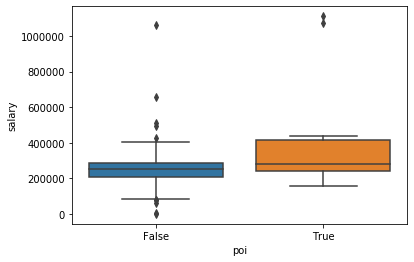

In [26]:
sns.boxplot(x='poi',y='salary',data=enron)

<a id='Bonus'></a>

### Bonus

In [27]:
average_bonus = enron.groupby('poi').mean()['bonus']
average_bonus

poi
False    9.868249e+05
True     2.075000e+06
Name: bonus, dtype: float64

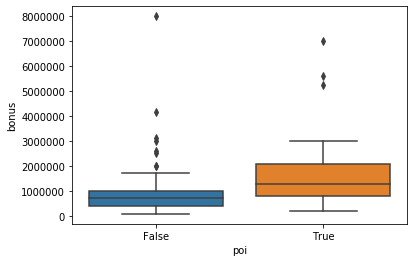

In [28]:
sns.boxplot(x='poi',y='bonus',data=enron)

Wow!  An 8 million dollar bonus seems a bit much, but you can see the difference between John and Ken in other ways.  Below, you can see the difference between all other financial features is significant.  And, bonuses among POIs are still higher on average than non-POIs.  So, despite our non-POI outlier, this feature may still be useful in training our algorithm.

In [29]:
enron[(enron['bonus']>6000000)][['name','salary','bonus','exercised_stock_options','restricted_stock','total_stock_value','poi']]

,name,salary,bonus,exercised_stock_options,restricted_stock,total_stock_value,poi
42,LAVORATO JOHN J,339288.0,8000000.0,4158995.0,1008149.0,5167144.0,False
64,LAY KENNETH L,1072321.0,7000000.0,34348384.0,14761694.0,49110078.0,True


<a id='Total Payments'></a>

### Total Payments

In [30]:
average_total_payments = enron.groupby('poi').mean()['total_payments']
average_total_payments

poi
False    1.725091e+06
True     7.913590e+06
Name: total_payments, dtype: float64

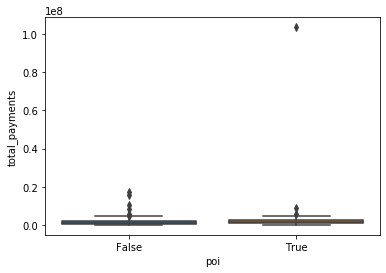

In [31]:
sns.boxplot(x='poi',y='total_payments',data=enron)

Wow!  That last boxplot has an outlier that is obviously pulling the mean waaaaaaaay up.  Who is that?

In [32]:
enron[(enron['total_payments']>40000000)][['name','total_payments','poi']]

,name,total_payments,poi
64,LAY KENNETH L,103559793.0,True


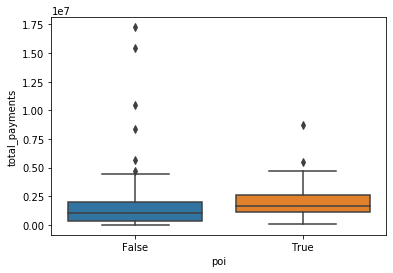

In [33]:
#take Ken Lay out of the poi boxplot

kl_not_in = enron[(enron['total_payments']<40000000)]

sns.boxplot(x='poi',y='total_payments',data=kl_not_in)

Well, at least now we can see the boxplots more clearly.  There's not much of a difference between POI and non-POI here when we take Ken Lay out, so total_payments probably won't be a feature we'll use.

<a id='Stock Options'></a>

### Exercised Stock Options

In [34]:
average_optionsvalue = enron.groupby('poi').mean()['exercised_stock_options']
average_optionsvalue

poi
False    1.947752e+06
True     1.046379e+07
Name: exercised_stock_options, dtype: float64

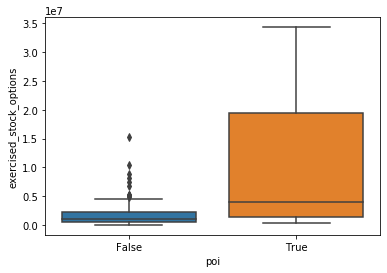

In [35]:
sns.boxplot(x='poi',y='exercised_stock_options',data=enron)

Exercised stock options definitely looks to be higher among POIs, so this will definitely be a feature to include in our list of features for our algorithm.  

<a id='Total BE'></a>

### Total Bonus and Exercised Stock Options

In [36]:
average_total_sbe = enron.groupby('poi').mean()['total_be']
average_total_sbe

poi
False    1.870028e+06
True     8.820307e+06
Name: total_be, dtype: float64

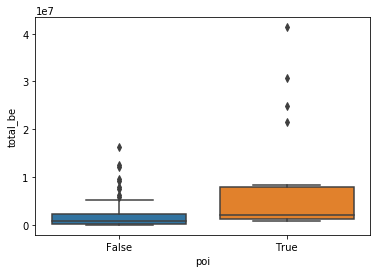

In [37]:
sns.boxplot(x='poi',y='total_be',data=enron)

Total Bonus and Exercised Stock Options might be useful, but it might also just add to the noise.  So, maybe we won't use this one.  

<a id='Total Stock Value'></a>

### Total Stock Value

In [38]:
average_stockvalue = enron.groupby('poi').mean()['total_stock_value']
average_stockvalue

poi
False    2.374085e+06
True     9.165671e+06
Name: total_stock_value, dtype: float64

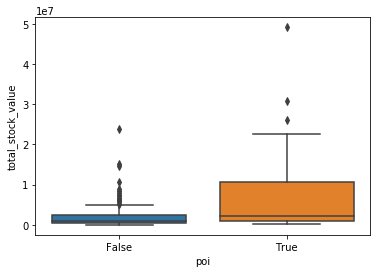

In [39]:
sns.boxplot(x='poi',y='total_stock_value',data=enron)

Total stock value for POIs on average is much higher than non-POIs.  This feature is another good option for our POI identifier.

<a id='Total Millions'></a>

### Total Payments and Stock Value in Millions

In [40]:
average_total_comp = enron.groupby('poi').mean()['total_millions']
average_total_comp

poi
False     3.440052
True     17.079261
Name: total_millions, dtype: float64

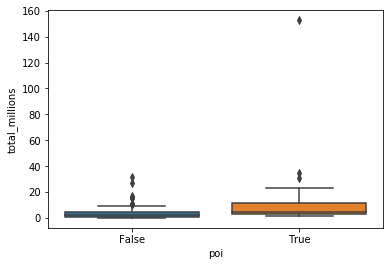

In [41]:
sns.boxplot(x='poi',y='total_millions',data= enron)

Let's try that one again without Ken Lay...

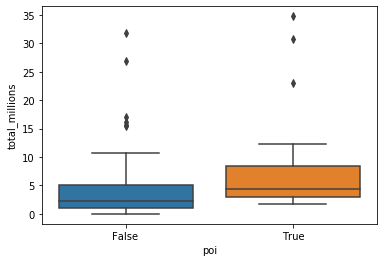

In [42]:
sns.boxplot(x='poi',y='total_millions',data= kl_not_in)

Hmmmm, maybe we didn't need to add this feature.  We can look closer by using lmplot and pairplot later on in our analysis.

<a id='Shared Receipt'></a>

### Shared Receipt with POI

In [43]:
average_shared_receipt = enron.groupby('poi').mean()['shared_receipt_with_poi']
average_shared_receipt

poi
False    1058.527778
True     1783.000000
Name: shared_receipt_with_poi, dtype: float64

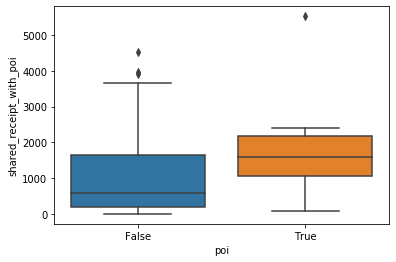

In [44]:
sns.boxplot(x='poi',y='shared_receipt_with_poi',data= enron)

<a id='To Messages'></a>

### To Messages

In [45]:
average_to = enron.groupby('poi').mean()['to_messages']
average_to

poi
False    2007.111111
True     2417.142857
Name: to_messages, dtype: float64

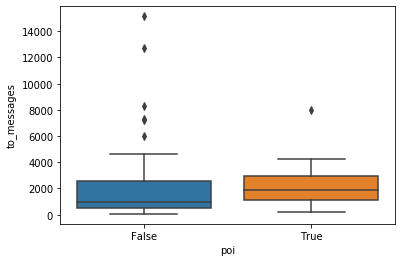

In [46]:
sns.boxplot(x='poi',y='to_messages',data= enron)

<a id='From Messages'></a>

### From Messages

In [47]:
average_from = enron.groupby('poi').mean()['from_messages']
average_from

poi
False    668.763889
True     300.357143
Name: from_messages, dtype: float64

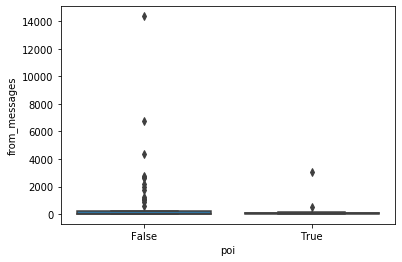

In [48]:
sns.boxplot(x='poi',y='from_messages',data= enron)

<a id='FTP'></a>

### Fraction to POI

In [49]:
average_fraction_to = enron.groupby('poi').mean()['fraction_to_poi']
average_fraction_to

poi
False    0.152669
True     0.345470
Name: fraction_to_poi, dtype: float64

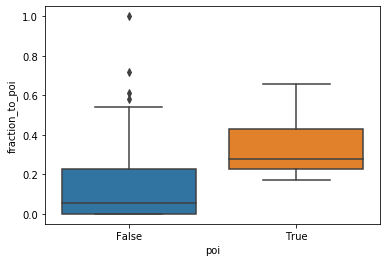

In [50]:
sns.boxplot(x='poi',y='fraction_to_poi',data= enron)

Fraction_to_poi looks like a good feature to add to our list, since most of the poi distribution is in the upper range of the non-poi distribution.

<a id='FFP'></a>

### Fraction from POI

In [51]:
average_fraction_from = enron.groupby('poi').mean()['fraction_from_poi']
average_fraction_from

poi
False    0.036107
True     0.047507
Name: fraction_from_poi, dtype: float64

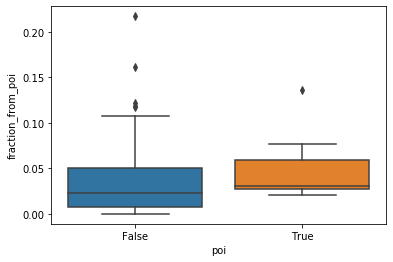

In [52]:
sns.boxplot(x='poi',y='fraction_from_poi',data= enron)

<a id='Outliers'></a>

## Outliers

When looking at the stats for poi and non-poi for the first time, I noticed that the non-poi stats were much higher than the poi stats.  That's when I remembered I didn't account for the "TOTAL" key.  So, I went back and skipped over that key when writing to my csv.  I figured I'd just pop it out of my dictionary later if I need to.  After doing that, my stats were as expected.  Now, let's see what other outliers we can find.  In the pairplot above, there were two POIs that really stood out.  Let's take a closer look in the following lmplot.

C:\Users\naman\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(27.34038194444446, 0.5, 'Salary')

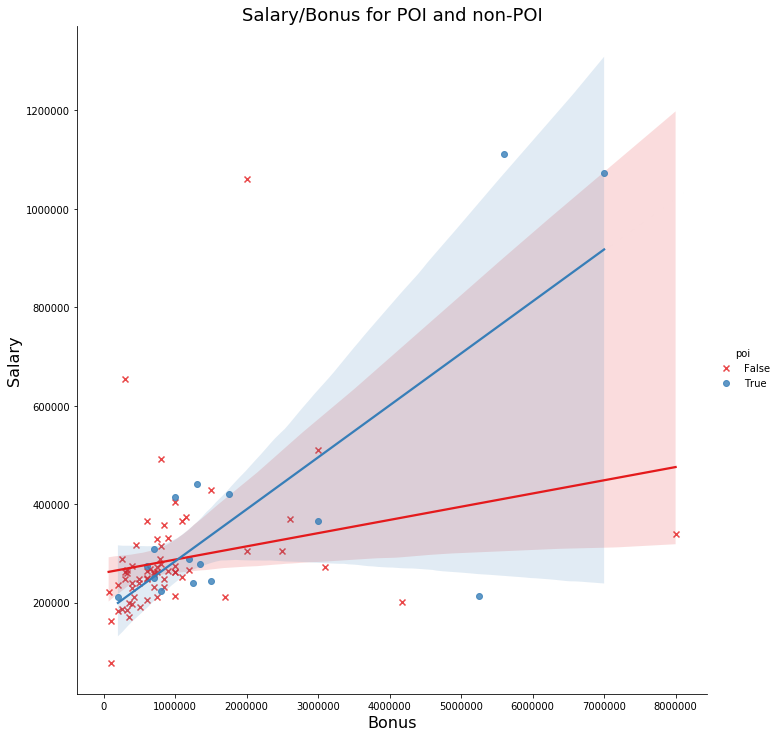

In [53]:
sns.lmplot(x='bonus', y= 'salary', hue='poi', data=enron, palette='Set1',size=10,markers=['x','o'])
plt.title('Salary/Bonus for POI and non-POI', fontsize=18)
plt.xlabel('Bonus', fontsize=16)
plt.ylabel('Salary', fontsize=16)


In [54]:
#Who are the two outliers in blue with the high salary AND high bonus?  Ken Lay and Jeff Skilling of course!

enron[(enron['salary']>1000000)][['name','salary','bonus','poi']]

,name,salary,bonus,poi
64,LAY KENNETH L,1072321.0,7000000.0,True
95,SKILLING JEFFREY K,1111258.0,5600000.0,True
127,FREVERT MARK A,1060932.0,2000000.0,False


These are two of our persons of interest, so we definitely don't want to take them out of our dataset.  

According to [Executive Excess 2002](http://d3n8a8pro7vhmx.cloudfront.net/ufe/legacy_url/629/Executive_Excess_2002.pdf?1448073268)
>Top executives at 23 companies under investigation for their accounting practices earned far more during the
past three years than the average CEO at large companies. CEOs at the firms under investigation earned an
average of 62.2 million dollars during 1999-2001, 70 percent more than the average of 36.5 million dollars for all
leading executives for that period.

We may also be able to find a few datapoints that are just causing noise by checking for lots of missing values in rows.

In [57]:
#check for more than 20 missing values for each datapoint

i = 0

for row in enron.isnull().sum(axis=1):
    if row > 20:
        print( enron.iloc[i])
    i+=1

name                         LOCKHART EUGENE E
salary                                     NaN
to_messages                                NaN
deferral_payments                          NaN
total_payments                             NaN
loan_advances                              NaN
bonus                                      NaN
email_address                              NaN
restricted_stock_deferred                  NaN
deferred_income                            NaN
total_stock_value                          NaN
expenses                                   NaN
from_poi_to_this_person                    NaN
exercised_stock_options                    NaN
from_messages                              NaN
other                                      NaN
from_this_person_to_poi                    NaN
poi                                      False
long_term_incentive                        NaN
shared_receipt_with_poi                    NaN
restricted_stock                           NaN
director_fees

In [58]:
#check for missing values in features

enron.isnull().sum()

name                           0
salary                        51
to_messages                   59
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
email_address                 34
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
from_poi_to_this_person       59
exercised_stock_options       44
from_messages                 59
other                         53
from_this_person_to_poi       59
poi                            0
long_term_incentive           80
shared_receipt_with_poi       59
restricted_stock              36
director_fees                129
total_be                       0
fraction_to_poi               59
fraction_from_poi             59
total_millions                 0
dtype: int64

Loan advances has 142 missing values!  That's definitely a feature we can remove before we run our tests.


## Transform, Select, and Scale

Now let's transform, select, and scale our features.  

In [63]:
import sys
import pickle
sys.path.append("../tools/")

from tools.feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data

In [84]:
features_full_list = enron.columns.tolist()

features_full_list.remove('name')
features_full_list.remove("email_address") #take out 'email_address'
features_full_list.remove("loan_advances") #take out 'loan_advances' because of missing values
features_full_list.remove("director_fees") #take out 'director_fees' because of missing values
features_full_list.remove("poi") #take out 'poi'


features_list = ['poi']
for n in features_full_list:
    features_list.append(n)
features_full_list

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'long_term_incentive',
 'shared_receipt_with_poi',
 'restricted_stock',
 'total_be',
 'fraction_to_poi',
 'fraction_from_poi',
 'total_millions']

In [85]:
features_full_list

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'long_term_incentive',
 'shared_receipt_with_poi',
 'restricted_stock',
 'total_be',
 'fraction_to_poi',
 'fraction_from_poi',
 'total_millions']

In [86]:
### Remove outliers that corrupt the data
enron_dict.pop('TOTAL', 0)

0

In [87]:
#remove datapoints that create noise

enron_dict.pop('LOCKHART EUGENE E',0)

0

In [88]:
#take out all 'loan_advances' because of missing values

for name in enron_dict:
    enron_dict[name].pop('loan_advances',0)

In [89]:
### Create new feature(s)
#add fraction of emails from and to poi
#idea for this added feature taken from course materials

def computeFraction( poi_messages, all_messages ):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
   """
    fraction = 0.
    if poi_messages != 'NaN' and all_messages != 'NaN':
        fraction = float(poi_messages)/all_messages


    return fraction

In [90]:
for name in enron_dict:

    data_point = enron_dict[name]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    
    enron_dict[name]["fraction_from_poi"] = fraction_from_poi
  
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )

    enron_dict[name]["fraction_to_poi"] = fraction_to_poi


In [91]:
#add total_be to dictionary

for name in enron_dict:
    data_point = enron_dict[name]
    
    bonus = data_point['bonus']
    if bonus == 'NaN':
        bonus = 0.0
    options = data_point['exercised_stock_options']
    if options == 'NaN':
        options = 0.0
    total = bonus+options

    enron_dict[name]['total_be'] = total
    
    


In [92]:
#add total compensation in millions to dataset

for name in enron_dict:
    data_point = enron_dict[name]
    
    total_payments = data_point['total_payments']
    if total_payments == 'NaN':
        total_payments = 0.0
    total_stock = data_point['total_stock_value']
    if total_stock == 'NaN':
        total_stock = 0.0
    total = (total_payments + total_stock)/1000000

    enron_dict[name]['total_millions'] = total

<b>SELECT FEATURES</b>

I've selected a few lists that may be useful in training our classifiers.  Each of the features selected may be able to give us some insight into the compensation and behavior of a POI.  The total compensation (total_millions) shows us that, on average, POIs are compensated more highly than non-POIs.  The same holds true for individual payments, like salary and bonus.  And, when it comes to stock behavior, POIs are more active in their exercising of stock options(exercised_stock_options.)  Other features, like from_messages, show a kind of pattern in e-mail behavior.  POIs do not send many messages.  However, the ones they do send are often to other POIs(fraction_to_poi).  These are all features we'll test before making our final feature selection.
<br><br>
<b>We will start out with our full list as a baseline and test that against our selected lists' metrics in order to find our final feature list for our POI identifier.  Our lists were chosen based on our stats and plots generated in our analysis.  Those features that showed a greater overall difference between POI and non-POI stats were chosen</b>

In [93]:
print(features_list) #list of features available for testing

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'total_be', 'fraction_to_poi', 'fraction_from_poi', 'total_millions']


In [94]:
### Select what features to use
first_list = ['poi','total_millions','fraction_to_poi','from_messages']
second_list = ['poi','total_be','fraction_to_poi','from_messages']
third_list = ['poi','salary','bonus','fraction_to_poi','from_messages']
fourth_list = ['poi','bonus','exercised_stock_options','fraction_to_poi']
features_final_list = fourth_list
print("Final List", features_final_list)

Final List ['poi', 'bonus', 'exercised_stock_options', 'fraction_to_poi']


<a id="Algorithm"></a>

## Algorithm Selection

<a id='Metrics'></a>

### Evaluation Metrics

In [95]:
#Evaluation metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.model_selection import StratifiedShuffleSplit

In [96]:
#Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [113]:
# %load 'my_test.py'
def test_list(classifier, feature_list, enron_dict):
    
    my_dataset = enron_dict
    
    data = featureFormat(my_dataset, feature_list, sort_keys = True) 
    labels, features = targetFeatureSplit(data) 
    
    X = np.array(features)
    y = np.array(labels)
    sss = StratifiedShuffleSplit(n_splits = 1000, test_size=0.3, random_state=42)      
    for train_index, test_index in sss.split(features, labels):
        features_train, features_test = X[train_index], X[test_index]
        labels_train, labels_test = y[train_index], y[test_index]
        
    clf = classifier
    clf.fit(features_train,labels_train)
    pred = clf.predict(features_test)
    
    if classifier == DecisionTreeClassifier():
        return {'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),
                'Recall': recall_score(labels_test,pred), 'Feature Importance': clf.feature_importances_}
    
    return {'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),
            'Recall': recall_score(labels_test,pred)}
    
    
   

<a id='Test'></a>

### Performance:  Accuracy, Precision, and Recall

Below, we will test each list using three different algorithms: Naive Bayes, Decision Tree, and KNearest Neighbors.  
- Our accuracy score will show us our ratio of correctly predicted observation to the total observations.  
    Accuracy = TP+TN/TP+FP+FN+TN
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.  
    Precision = TP/TP+FP
- And, recall is the ratio of correctly predicted positive observations to all observations in the class.  
    Recall = TP/TP+FN

When trying to identify POIs, we want to see as few falsely identified positives.  We don't want to falsely identify anyone as a POI.  So, I'd say precision is a bit more important here.  Let's see how each list does using each classifier.

In [114]:
#full list
print(features_list)
print ('GaussianNB: ', test_list(GaussianNB(),features_list,enron_dict))
print ('DecisionTree: ', test_list(DecisionTreeClassifier(),features_list,enron_dict))
print ('KNeighbors: ', test_list(KNeighborsClassifier(),features_list,enron_dict))

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'total_be', 'fraction_to_poi', 'fraction_from_poi', 'total_millions']
GaussianNB:  {'Accuracy': 0.6590909090909091, 'Precision': 0.2631578947368421, 'Recall': 0.8333333333333334}
DecisionTree:  {'Accuracy': 0.75, 'Precision': 0.14285714285714285, 'Recall': 0.16666666666666666}
KNeighbors:  {'Accuracy': 0.8863636363636364, 'Precision': 0.6666666666666666, 'Recall': 0.3333333333333333}


In [117]:
#first list
print (first_list)
print ('GaussianNB: ', test_list(GaussianNB(),first_list,enron_dict))
print ('DecisionTree: ', test_list(DecisionTreeClassifier(),first_list,enron_dict))
print ('KNeighbors: ', test_list(KNeighborsClassifier(),first_list,enron_dict))

['poi', 'total_millions', 'fraction_to_poi', 'from_messages']
GaussianNB:  {'Accuracy': 0.9302325581395349, 'Precision': 1.0, 'Recall': 0.4}
DecisionTree:  {'Accuracy': 0.7674418604651163, 'Precision': 0.14285714285714285, 'Recall': 0.2}
KNeighbors:  {'Accuracy': 0.8837209302325582, 'Precision': 0.0, 'Recall': 0.0}


C:\Users\naman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
#second list
print (second_list)
print ('GaussianNB: ', test_list(GaussianNB(),second_list,enron_dict))
print ('DecisionTree: ', test_list(DecisionTreeClassifier(),second_list,enron_dict))
print ('KNeighbors: ', test_list(KNeighborsClassifier(),second_list,enron_dict))

['poi', 'total_be', 'fraction_to_poi', 'from_messages']
GaussianNB:  {'Accuracy': 0.7948717948717948, 'Precision': 0.3333333333333333, 'Recall': 0.3333333333333333}
DecisionTree:  {'Accuracy': 0.7692307692307693, 'Precision': 0.2, 'Recall': 0.16666666666666666}
KNeighbors:  {'Accuracy': 0.8205128205128205, 'Precision': 0.4, 'Recall': 0.3333333333333333}


In [119]:
#third list
print (third_list)
print ('GaussianNB: ', test_list(GaussianNB(),third_list,enron_dict))
print ('DecisionTree: ', test_list(DecisionTreeClassifier(),third_list,enron_dict))
print ('KNeighbors: ', test_list(KNeighborsClassifier(),third_list,enron_dict))

['poi', 'salary', 'bonus', 'fraction_to_poi', 'from_messages']
GaussianNB:  {'Accuracy': 0.7647058823529411, 'Precision': 0.2857142857142857, 'Recall': 0.4}
DecisionTree:  {'Accuracy': 0.8235294117647058, 'Precision': 0.4, 'Recall': 0.4}
KNeighbors:  {'Accuracy': 0.8823529411764706, 'Precision': 0.6666666666666666, 'Recall': 0.4}


In [120]:
#fourth_list
print (fourth_list)
print ('GaussianNB: ', test_list(GaussianNB(),fourth_list,enron_dict))
print ('DecisionTree: ', test_list(DecisionTreeClassifier(),fourth_list,enron_dict))
print ('KNeighbors: ', test_list(KNeighborsClassifier(),fourth_list,enron_dict))

['poi', 'bonus', 'exercised_stock_options', 'fraction_to_poi']
GaussianNB:  {'Accuracy': 0.7368421052631579, 'Precision': 0.14285714285714285, 'Recall': 0.2}
DecisionTree:  {'Accuracy': 0.7105263157894737, 'Precision': 0.2, 'Recall': 0.4}
KNeighbors:  {'Accuracy': 0.9210526315789473, 'Precision': 0.75, 'Recall': 0.6}


With an accuracy score of 92%, a precision score of 75%, and a recall score of 60% ...

Our Final List includes <b>'poi', 'bonus', 'exercised stock options', and 'fraction to poi'</b>
<br>
Our Final Classifier with be <b>KNeighbors</b>

<a id='Validating'></a>

## Validation

We've already implemented our validation process, but here we will discuss its importance.  Without validating our classifier using training/testing data, we have no way of measuring its accuracy and reliability.  Training and testing the classifier against the same data will only yield overfitting results.  This is why validation is important.  By using StratifiedShuffleSplit to split our data into training and testing data, we can make sure that our classes are allocated by the same ratio set for training/testing and that each datapoint in the class is randomly selected.  Because of our small dataset, setting the iterations to 1000 will give us more reliable results in the end, as we will have trained and tested on almost all of our datapoints.  The only downside is the run time.

In [121]:
### Store to my_dataset for easy export below.
my_dataset = enron_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_final_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [127]:
#Validation using StratifiedShuffleSplit in order to evenly dispurse the classes between training and test data
X = np.array(features)
y = np.array(labels)
sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)      
for train_index, test_index in sss.split(features, labels):
    features_train, features_test = X[train_index], X[test_index]
    labels_train, labels_test = y[train_index], y[test_index]

#check for accuracy
    
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)

print (clf.score(features_test, labels_test))

0.9210526315789473



<a id="Tuning"></a>

## Tuning

Even though we've all but settled on KNeighbors, let's see if tuning the parameters of our Decision Tree Classifier would make a difference.  Tuning parameters can sometimes significantly change our performance metrics outcome.  Parameters can control for overfitting/underfitting, so tuning them can certainly change the metrics.

In [128]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [140]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#set min_samples_split to 3 and increase until no longer helpful
clf = DecisionTreeClassifier(min_samples_split=9)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

In [141]:
"""  Can we do better?  [0.71052631578947367, 0.20000000000000001, 0.40000000000000002]"""

#print performance metrics
print ({'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),\
       'Recall': recall_score(labels_test,pred)})

{'Accuracy': 0.7631578947368421, 'Precision': 0.25, 'Recall': 0.4}


How about our KNeighbors Classifier?  What are the parameters?  If we changed any of them, would it make a difference?

In [142]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [143]:
"""Can we do better without overfitting?  [0.92105263157894735, 0.75, 0.59999999999999998]"""

#set n_neighbors to 2 and increase until metrics show overfitting
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

print ({'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),\
       'Recall': recall_score(labels_test,pred)})

{'Accuracy': 0.9473684210526315, 'Precision': 1.0, 'Recall': 0.6}


^OVERFIT!  

In [144]:
"""Can we still do better?  [0.92105263157894735, 0.75, 0.59999999999999998]"""

#set n_neighbors to 2,3, and 4

def test_param(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(features_train,labels_train)
    pred = clf.predict(features_test)

    return [accuracy_score(labels_test,pred), precision_score(labels_test,pred), recall_score(labels_test,pred)]

In [145]:
print ("2: ", test_param(2))
print ("3: ", test_param(3))
print ("4: ", test_param(4))

2:  [0.9210526315789473, 0.75, 0.6]
3:  [0.8947368421052632, 0.6, 0.6]
4:  [0.9210526315789473, 0.75, 0.6]


### GridSearchCV

When using GridSearchCV to find the best parameters for KNeighbors, our estimator gives us the same results.  

In [146]:
from sklearn.model_selection import GridSearchCV

k = np.arange(10)+1
leaf = np.arange(30)+1
params = {'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),'leaf_size': leaf,'n_neighbors': k}

clf_params = GridSearchCV(KNeighborsClassifier(), params, cv=5)
clf_params.fit(features_train,labels_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [147]:
clf_params.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Let's see what kind of results we get using the parameters "suggested" by GridSearchCV.

In [149]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

print ({'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),\
       'Recall': recall_score(labels_test,pred)})

{'Accuracy': 0.9210526315789473, 'Precision': 0.75, 'Recall': 0.6}


These are the same results as our default settings, so that's what we'll use.  

[Top](#top)

<a id="Analysis"></a>

### FINAL FEATURES and ALGORITHM SELECTION

Our final features, based on our feature analysis and testing, will be:

- Bonus
- Exercised Stock Options
- Fraction to POI

The KNeighbors Classifier, even without any parameter tuning, had a higher accuracy score than the Decision Tree Classifier with its min_samples_split tuned to 9.  So, we're going to use KNeighbors in our POI identifier.  KNearest Neighbors will help us zero in on pockets of POIs/non-POIs within our testing data.  The features I selected work well with this particular classifier because 'bonus' and 'exercised stock options' are good for training the algorithm to pick up on POI compensation trends, and 'fraction_to_poi' will help our algorithm pick up on POI e-mail behavior.  I narrowed it down to three features so as not to create noise.  When running our longer lists of features, we saw our precision and recall drop to zero, so cutting down our features to 3 was the strategy moving forward.  As we had already gotten rid of features with lots of missing data, it was easier to narrow them down and test each list against our chosen classifiers.

In [151]:
clf = KNeighborsClassifier()
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

print(accuracy_score(labels_test,pred))
print (precision_score(labels_test,pred))
print (recall_score(labels_test,pred))

0.9210526315789473
0.75
0.6


In [153]:
#test performance using tester.py

%run 'tester.py'

C:\Users\naman\Anaconda3\lib\site-packages\IPython\core\magics\execution.py:708: UserWarning: For Windows, use double quotes to wrap a filename: %run "mypath\myfile.py"
  warn('For Windows, use double quotes to wrap a filename: %run "mypath\\myfile.py"')
ERROR:root:File `"'tester.py'.py"` not found.


<a id='Thoughts'></a>

## Final Thoughts

With an accuracy of 85-95%, precision of 65-75%, and recall of 35-60%, I think our algorithm has done well considering the small amount of data we had to work with.  But, using our validation methods proved useful in creating a reliable algorithm. We've done pretty well, but I don't think I'd want to bet anyones life in prison on any algorithm trained on this data.  We could use more data!  Our Naive Bayes and Decision Tree Classifiers didn't perform as well.  Although, overfitting is a problem as you increase the number of 'n_neighbors' in our KNeighbors Classifier, we can avoid this by keeping the default setting of 5.  That left us with a working algorithm and some pretty solid evaluation metrics.  According to our confusion matrix, we were able to identify 97% of non-POIs and 60% of POIs.  I'd rather get a few POIs wrong than falsely identify a non-POI as a POI.  There may come a day when people will be convicted based on machine learning, so it's important that we be as accurate as possible.  This identifier only gets it wrong around 40% of the time.